<h1><center> Statistics and Data Analysis - Assignmet 02</center></h1>
<h2><center> Dor Hanegby - 204009633, Ben Levy - 203861968, Segev Fogel - 308559897</center></h2>

# Question 1.

    a. Produce histograms that compare the distribution of max heart rate using all non numerical columns to
    partition the set of samples.  State 2 conclusions you can try to draw from this analysis. 

In [854]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, geom

In [855]:
%matplotlib inline

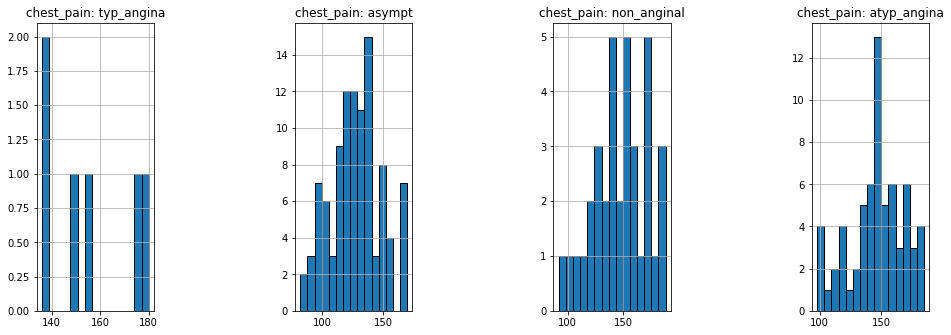

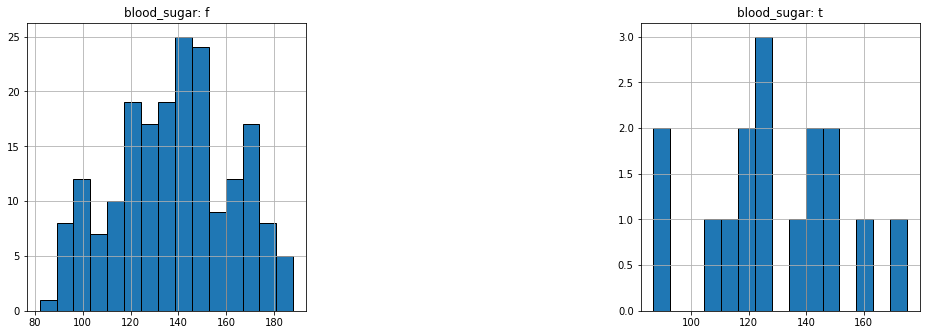

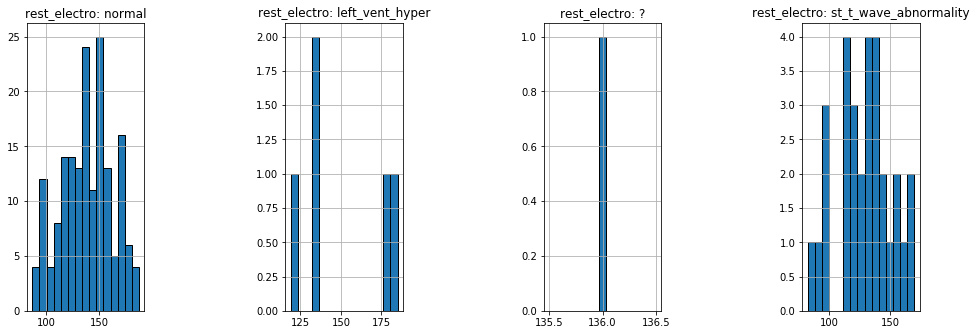

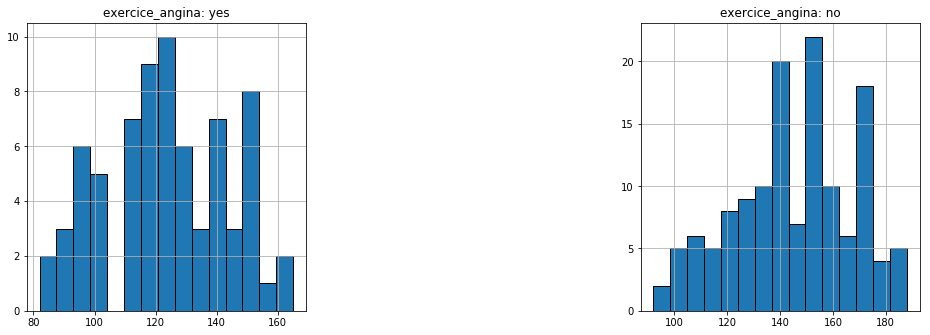

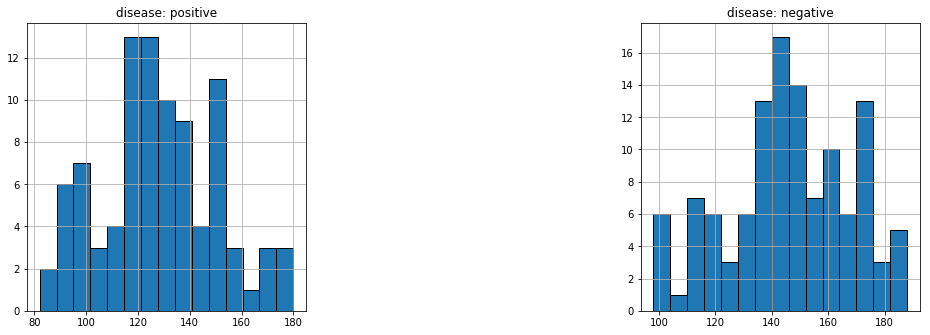

In [856]:
lyon=pd.read_excel("./HW2/UnivLyon_heart_disease_male.xls")

def plot_histograms(data):
    def plot_all_historgrams_with_hr(column):
            count = 0
            hr_chest_pain = data[['max_heart_rate', column]]
            all_categories = set(hr_chest_pain[column].tolist())
            plt.rcParams['figure.figsize'] = [16, 5]
            fig, axes = plt.subplots(1, len(all_categories))

            for cat in all_categories:
                cat_list = data[column] == cat
                hr_chest_pain[cat_list].hist(bins=15, edgecolor='black', ax=axes[count])
                axes[count].set_title('{}: {}'.format(column, cat))
                count = count + 1
            plt.subplots_adjust(left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 1.2, hspace = 0.2)

    non_categorial = ['age', 'max_heart_rate', 'rest_bpress']
    all_columns = list(data.columns.values)

    for column in all_columns:
        if column not in non_categorial:
            plot_all_historgrams_with_hr(column)
        

plot_histograms(lyon)

# Conclusions:

As we can see from the charts above we can conclude that
patients that have the disease have lower heart rate.furthermore
patients who got positive answer for angina exercise intend to have lower heart rate as well.

b. Produce a histogram that does the same for people over 50 vs people under 50

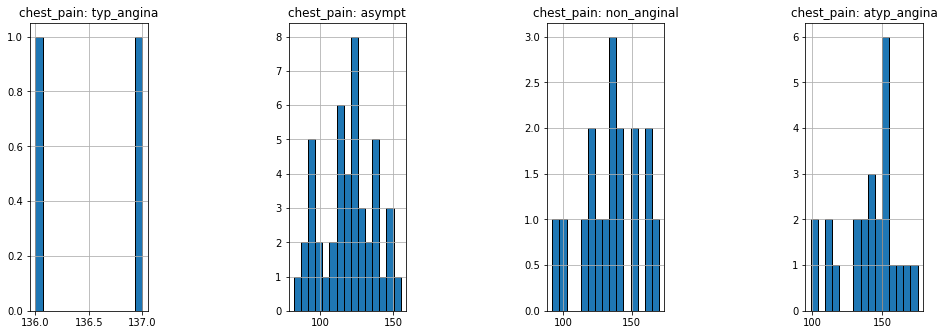

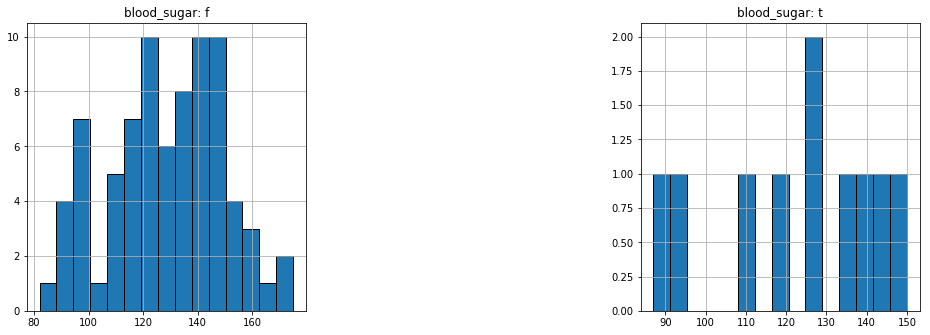

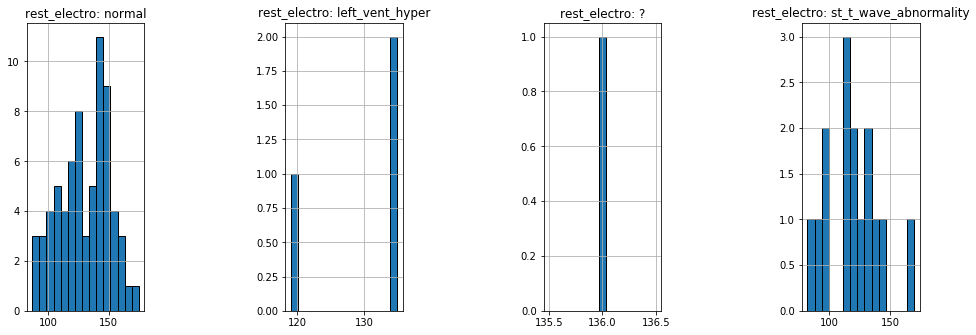

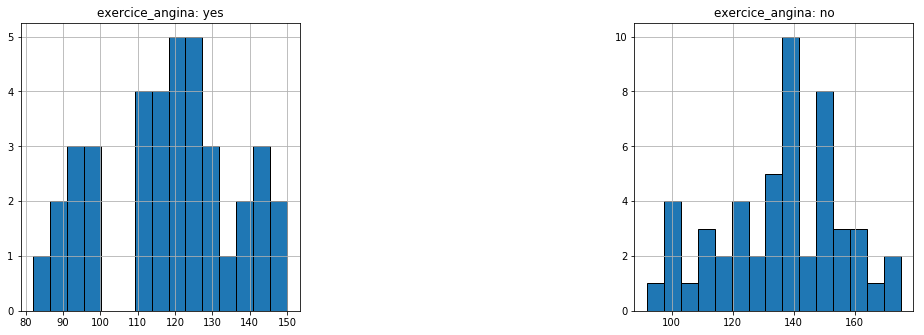

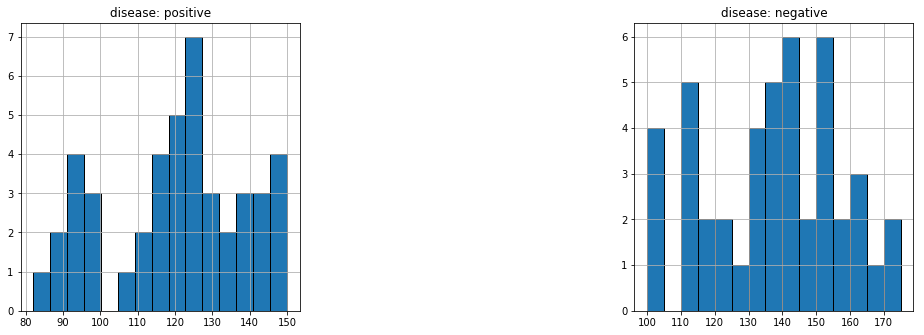

In [857]:
lyon_eldery = lyon['age'] > 50
lyon_over = lyon[lyon_eldery]
plot_histograms(lyon_over)

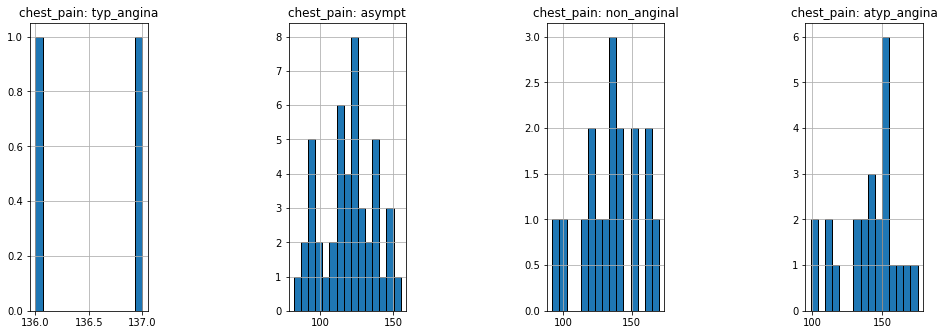

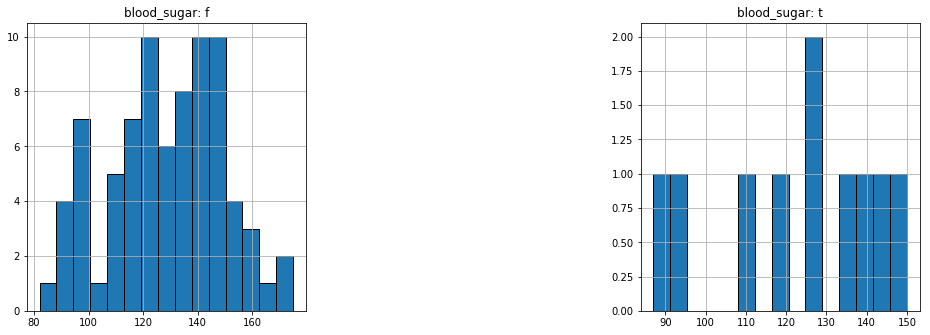

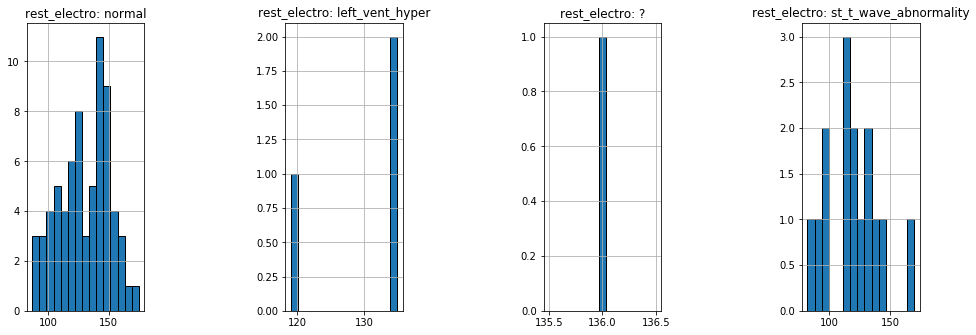

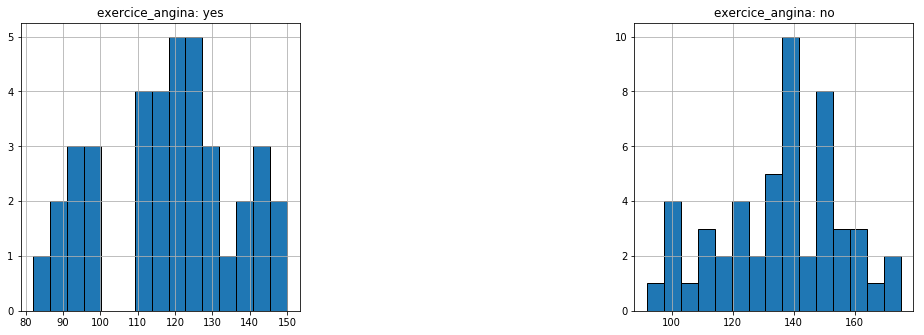

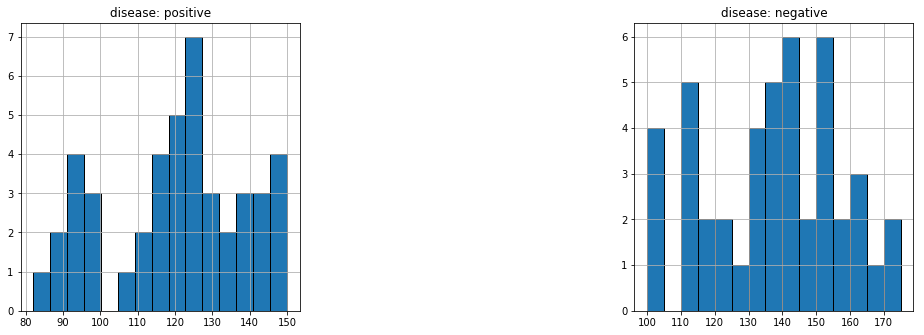

In [858]:
lyon_young = lyon['age'] <= 50
lyon_under = lyon[lyon_young]
plot_histograms(lyon_over)

c. Produce a boxplot representation of max heart rate binned according to age decades

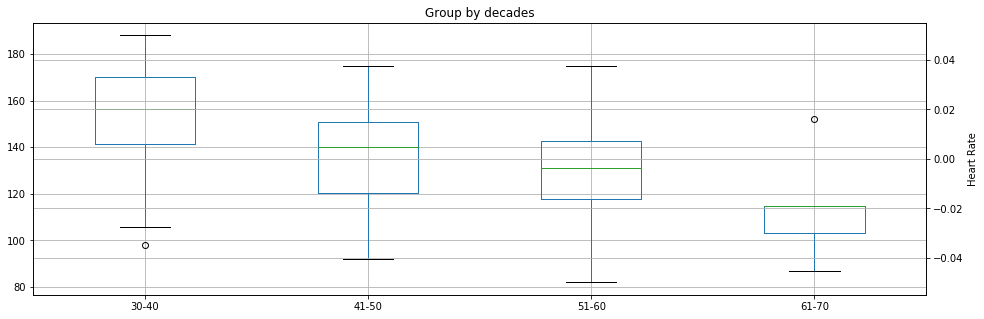

In [859]:
data = lyon[['max_heart_rate', 'age']]

data_young = data['age'] <= 50
data_under = data[data_young]

data_eldery = data['age'] > 50
data_over = data[data_eldery]
data_over.head()

def filter_by_age(min_age, max_age):
    condition = (data['age'] >= min_age) & (data['age'] <= max_age)
    filtered_data = data[condition]
    return filtered_data['max_heart_rate'].values.tolist()

df1 = pd.DataFrame({'30-40' : filter_by_age(30,40)})
df2 = pd.DataFrame({'41-50' : filter_by_age(41,50)})

df3 = pd.DataFrame({'51-60' : filter_by_age(51,60)})
df4 = pd.DataFrame({'61-70' : filter_by_age(61,70)})

dfs = pd.concat([df1, df2, df3, df4], sort=False)
mask = ((dfs == dfs) | dfs.isnull()) & (dfs.columns != 'E') & (dfs.columns != 'F')

fig, ax1 = plt.subplots()
dfs[mask].boxplot()

ax2 = ax1.twinx()
dfs[~mask].boxplot()
plt.ylabel('Heart Rate')
plt.title('Group by decades')
plt.show()




d. Produce graphical representations of the relationship between age, max heart rate and bpress

Text(0.5,0,'Rest bpress')

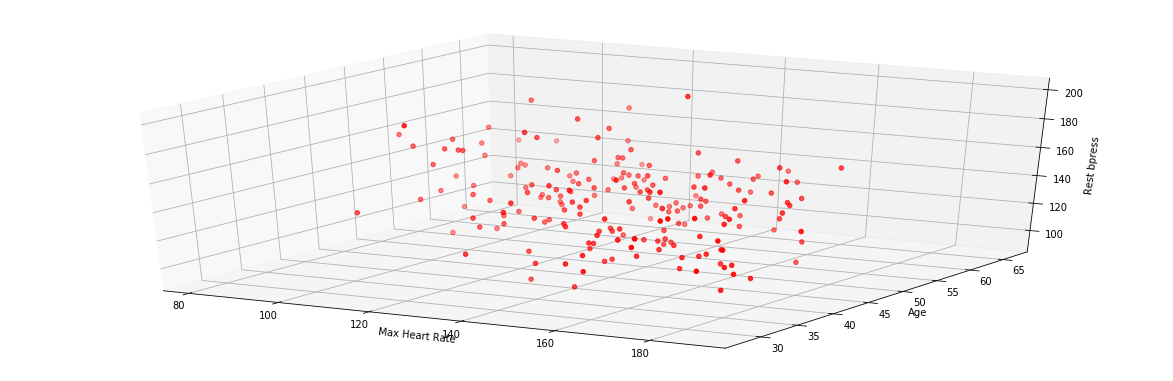

In [860]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

data = lyon[['max_heart_rate', 'age', 'rest_bpress']]

ax.scatter(data['max_heart_rate'],data['age'], data['rest_bpress'], c='red')
ax.set_xlabel('Max Heart Rate')
ax.set_ylabel('Age')
ax.set_zlabel('Rest bpress')

e. Produce a graphical representation of the best normal fit to the bpress distribution.

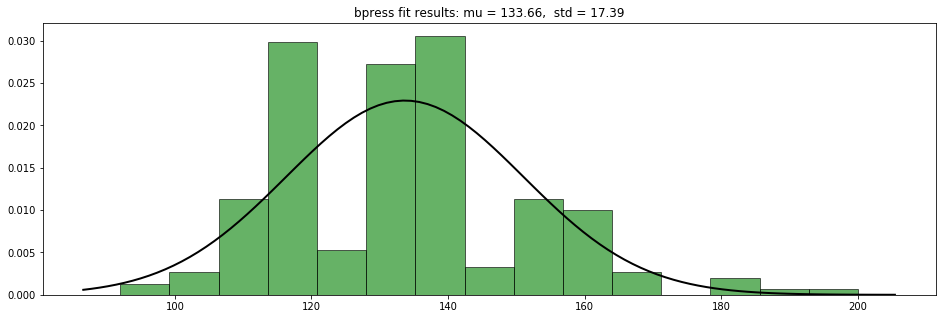

In [861]:
data = lyon['rest_bpress']

mu, std = norm.fit(data)

plt.hist(data, bins=15, density=True, alpha=0.6, color='green', edgecolor='black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "bpress fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

f. Produce a graphical representation of max heart rate showing F vs T blood sugar.

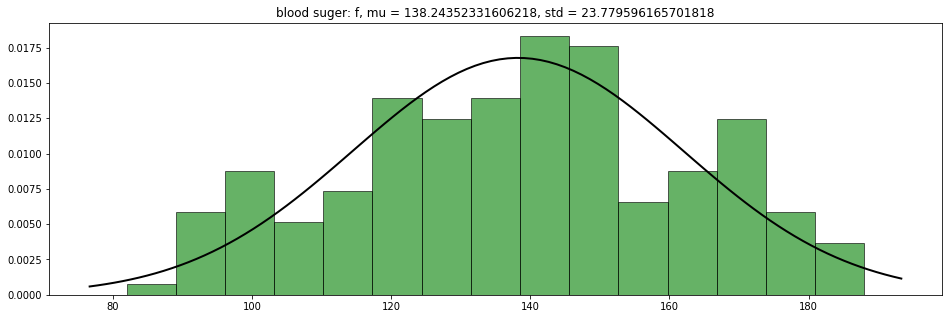

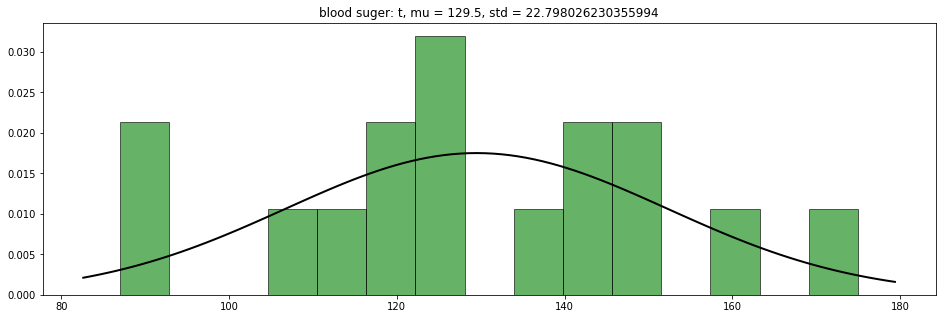

In [862]:
data = lyon[['blood_sugar', 'max_heart_rate']]
f_bs = data['blood_sugar'] == 'f'
t_bs = data['blood_sugar'] == 't'


data_f = data[f_bs]['max_heart_rate']
data_t = data[t_bs]['max_heart_rate']
def plot_histogram_with_fit(data, label):
    mu, std = norm.fit(data)

    plt.hist(data, bins=15, density=True, alpha=0.6, color='green', edgecolor='black')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title('blood suger: {}, mu = {}, std = {}'.format(label, mu,std))

    plt.show()

plot_histogram_with_fit(data_f, 'f')
plot_histogram_with_fit(data_t, 't')

g. Identify and report 3 “interesting” trends in the data. No need to provide statistical confidence at this point. (You can use your answers to all of the above for this)

# Trends:
    1.Older people intend to have lower heart rate.
    2.Blood sugar t have lower hart rate comparing to blood sugar f.
    3.As people get older the variance of the heart rate become smaller.

## Question 2
    a. First we start by showing the pdf of Fred, Mel and Sid time to repair a phonel.

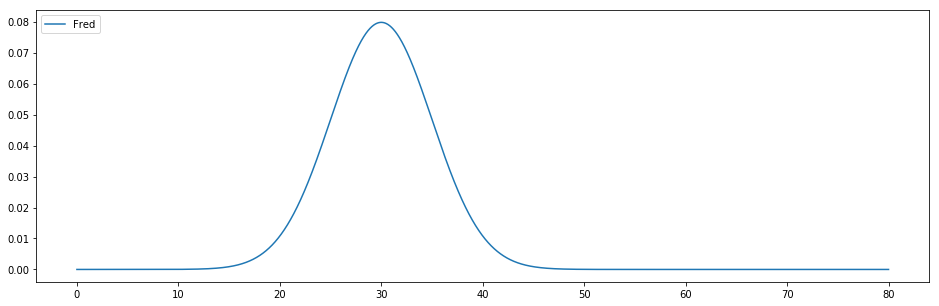

In [863]:
x_axis = np.arange(0, 80, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,30,5), label='Fred')
plt.legend(loc='upper left')
plt.show()

We want to calculte $P (F \leq 45)$ = $\phi(\frac{45 - 30}{5}) = \phi(3)$ where $\phi$ is the pdf of of the stanard normal distribution. therefore we shall calculate:

In [864]:
norm.cdf(3)

0.9986501019683699

We can say that the probability that Fred will be done fixing the phone by 11:45 is $99.86\%$

When a customer in North Randomistan orders a repair, there is a 50% chance Fred will do the work and 25% each that Mel or Sid will do the work.

    b. What is the distribution of the duration of repair in North Randomistan?

The distribution of the duration of repair in North Randomistan is a Gaussian mixture with the following parameters:

$ X_1 \sim N(30, 5), X_2 \sim N(35, 7), X_3 \sim N(40, 10) $
$w_1 = 0.5, w_2 = 0.25, w_3 = 0.25$

we define the Gaussian mixture PDF as:
$$ GM(x) = \sum_{i=1}^{3} w_i f_{X_i}(x)$$

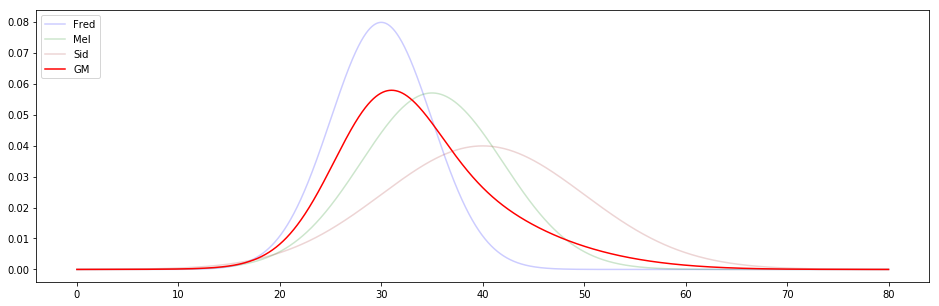

In [865]:
def gm_pdf(x):
    return 0.5 * norm.pdf(x,30,5) + 0.25 * norm.pdf(x,35,7) + 0.25 * norm.pdf(x,40,10)

plt.plot(x_axis, norm.pdf(x_axis,30,5), color='blue', label='Fred', alpha=0.2)
plt.plot(x_axis, norm.pdf(x_axis, 35, 7), color='green', label='Mel', alpha=0.2)
plt.plot(x_axis, norm.pdf(x_axis,40,10), color='brown', label='Sid', alpha=0.2)
plt.plot(x_axis, gm_pdf(x_axis), color='red', label='GM')
plt.legend(loc='upper left')
plt.show()

c. Let $\Phi$ denote the CDF of a standard normal random variable. Use $\Phi$ to express the CDF of the duration of a repair in North Randomistan.

$\Phi_{gm}(x) = \int_{-\infty}^{x} GM(x)dx = \int_{-\infty}^{x} \sum_{i=1}^{3} w_i f_{X_i}(x)dx = \sum_{i=1}^{3}  w_i \int_{-\infty}^{x} f_{X_i}(x)dx = \sum_{i=1}^{3} w_i \Phi_{X_i}(x) = \sum_{i=1}^{3} w_i \Phi(\frac{x - \mu_i}{\sigma_i}) $ 

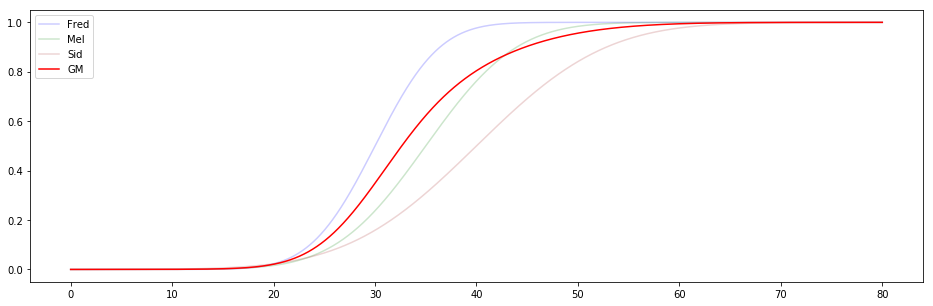

In [866]:
def gm_cdf(x):
    return 0.5 * norm.cdf(x,30,5) + 0.25 * norm.cdf(x,35,7) + 0.25* norm.cdf(x,40,10)

plt.plot(x_axis, norm.cdf(x_axis,30,5), color='blue', label='Fred', alpha=0.2)
plt.plot(x_axis, norm.cdf(x_axis, 35, 7), color='green', label='Mel', alpha=0.2)
plt.plot(x_axis, norm.cdf(x_axis,40,10), color='brown', label='Sid', alpha=0.2)
plt.plot(x_axis, gm_cdf(x_axis), color='red', label='GM')
plt.legend(loc='upper left')
plt.show()

d. If the repair starts at 11AM, what is the earliest time for which the customer can assume, at a 95% certainty, that the repair will be already done?

we want to find the earliest time $t$ such that $\Phi_{gm}(t) \geq 0.95$, in this simple case, we will answer that by iterating over the discrete values

In [867]:
for t in range(0, 80):
    if gm_cdf(t) >= 0.95:
        print('gm_cdf({}) = {}'.format(t, gm_cdf(t)))
        break
        

gm_cdf(50) = 0.956304779495262


we can conclude that for every $t \geq 50$ (actually somewhere between 49 and 50) it holds that $$\Phi_{gm}(t) \geq \Phi_{gm}(50) \geq 0.95$$
so we can conclude that after 11:50 AM the customer can assume at a 95% certainty that the phone is already repaired.

## Question 3
Assume that the data comes from a Gaussian mixture distribution (GMD). Furthermore, assume that $\mu_1 = 0$ and that $\sigma_1=\sigma_2=1$

a. Provide an estimate for the other parameters of the distribution.

We want to find the parameters of the GMD, specificly, we would like to find $w_1, w_2, \mu_2$, let us first observe the histogram of our data:

In [868]:
gmd=pd.read_excel("./HW2/GMD.xlsx")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27fe2898>]],
      dtype=object)

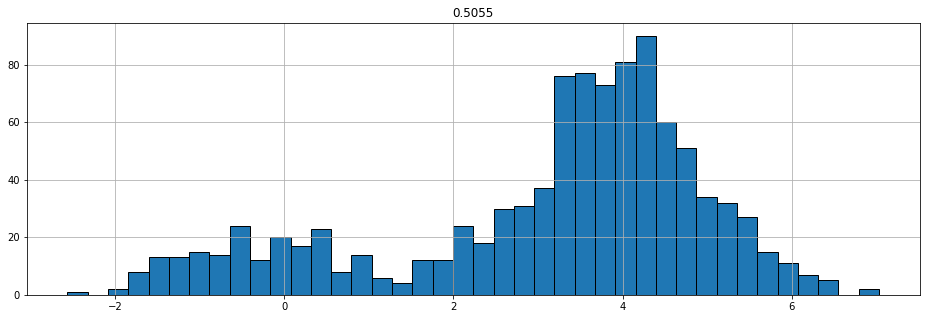

In [869]:
gmd.hist(bins=40, edgecolor='black')

Let us run EM over the data and print the Results:

In [870]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type="full",means_init=[[0], [4]], tol=0.001)
gmm.covariances_ = np.array([[1], [1]])
gmm = gmm.fit(gmd)

for index, mu in enumerate(gmm.means_):
    print('mean {}: {}'.format(index, mu))
for index, sigma in enumerate(gmm.covariances_):
    print('std {}: {}'.format(index, sigma))
for index, w in enumerate(gmm.weights_):
    print('weight {}: {}'.format(index, w))

mean 0: [-0.14508825]
mean 1: [3.96432875]
std 0: [[0.95036731]]
std 1: [[0.9546127]]
weight 0: 0.20563921297897275
weight 1: 0.794360787021029


We can conclude that by few iterations and rounding up that a good approximation will be
$$ \mu_1 = 0, \mu_2 = 4, \sigma_1 = \sigma_2 = 1, w_1 = 0.2, w_2 = 0.8$$

b. Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

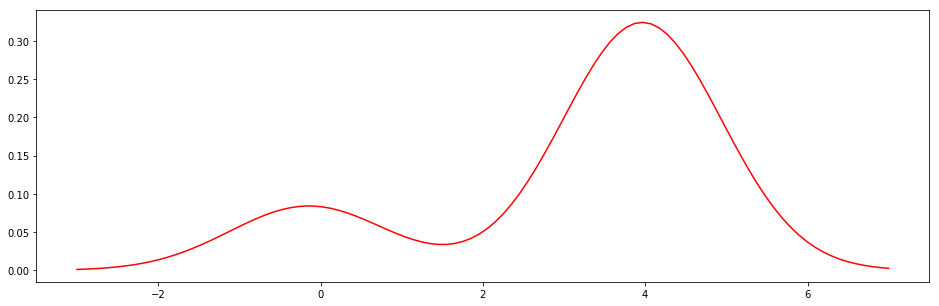

In [871]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-3, 7, 100).reshape(100,1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)
ax.plot(x, pdf, color='red')
plt.show()

We chose the limits to be $-3$ and $7$ because they are $3$ standard divations from the means of the gaussians and by that we get $99.7\%$ of each distribution which depicts well the distribution itself. 

c. Describe two ways for generating data for a GMD random variable with:
centers at  $\mu_1+3$ and $\mu_2+5$
$\sigma_1=\sigma_2=1$
$w_1=w_2=0.5$

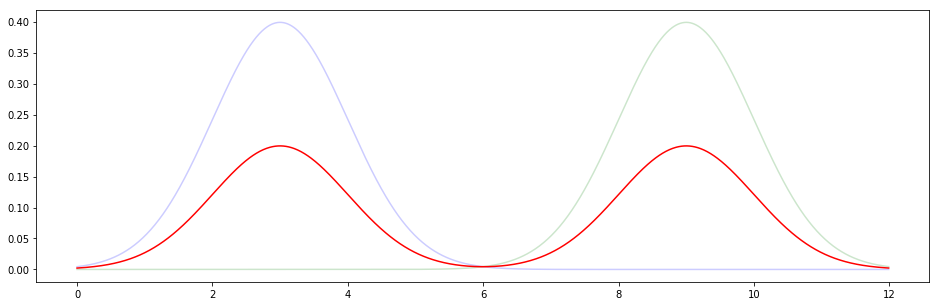

In [872]:
def gm_pdf(x):
    return 0.5 * norm.pdf(x,3,1) + 0.5 * norm.pdf(x,9,1)
x_axis = np.arange(0, 12, 0.01)
plt.plot(x_axis, norm.pdf(x_axis,3,1), color='blue', alpha=0.2)
plt.plot(x_axis, norm.pdf(x_axis,9,1), color='green', alpha=0.2)
plt.plot(x_axis, gm_pdf(x_axis), color='red', label='GM')
plt.show()

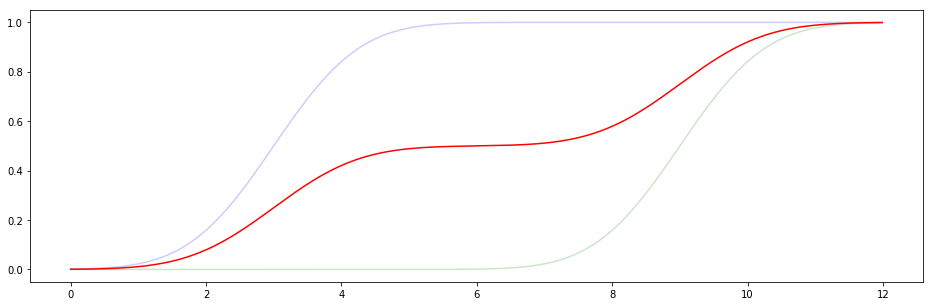

(array([ 5.,  1.,  5., 21., 13., 24., 37., 44., 65., 50., 47., 53., 46.,
        32., 19., 21.,  9.,  4.,  4.,  0.,  7.,  1.,  2., 19., 22., 16.,
        32., 46., 54., 52., 38., 52., 60., 31., 15., 19., 23.,  4.,  2.,
         5.]),
 array([ 0.10454267,  0.40111347,  0.69768426,  0.99425506,  1.29082586,
         1.58739666,  1.88396745,  2.18053825,  2.47710905,  2.77367985,
         3.07025065,  3.36682144,  3.66339224,  3.95996304,  4.25653384,
         4.55310464,  4.84967543,  5.14624623,  5.44281703,  5.73938783,
         6.03595862,  6.33252942,  6.62910022,  6.92567102,  7.22224182,
         7.51881261,  7.81538341,  8.11195421,  8.40852501,  8.70509581,
         9.0016666 ,  9.2982374 ,  9.5948082 ,  9.891379  , 10.1879498 ,
        10.48452059, 10.78109139, 11.07766219, 11.37423299, 11.67080378,
        11.96737458]),
 <a list of 40 Patch objects>)

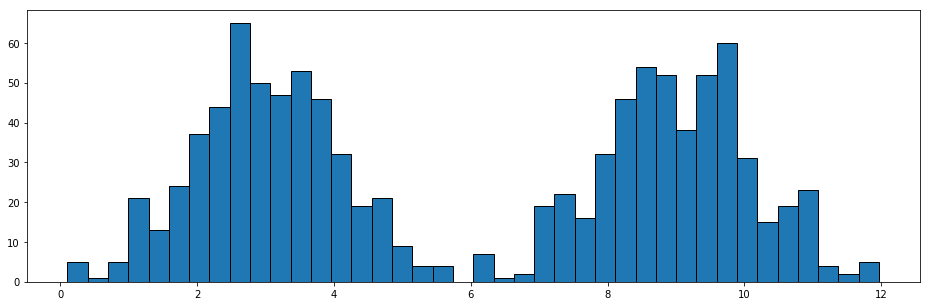

In [873]:
def gm_pdf(x):
    return 0.5 * norm.pdf(x,3,1) + 0.5 * norm.pdf(x,9,1)

def gm_cdf(x):
    return 0.5 * norm.cdf(x,3,1) + 0.5 * norm.cdf(x,9,1)

x_axis = np.arange(0, 12, 0.01)
plt.plot(x_axis, norm.cdf(x_axis,3,1), color='blue', alpha=0.2)
plt.plot(x_axis, norm.cdf(x_axis, 9, 1), color='green', alpha=0.2)
plt.plot(x_axis, gm_cdf(x_axis), color='red', label='GM')
plt.show()

random_numbers = []
for i in range(12):
    points_to_generate = np.round((gm_cdf(i + 1) - gm_cdf(i)) * 1000)
    for j in range (int(points_to_generate)):
        random_numbers.append(i + np.random.random_sample())
plt.hist(random_numbers, bins=40, edgecolor='black')

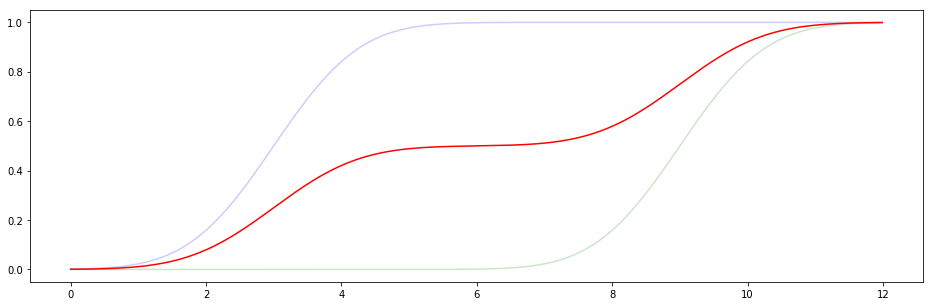

In [874]:
def gm_pdf(x):
    return 0.5 * norm.pdf(x,3,1) + 0.5 * norm.pdf(x,9,1)

def gm_cdf(x):
    return 0.5 * norm.cdf(x,3,1) + 0.5 * norm.cdf(x,9,1)
plt.plot(x_axis, norm.cdf(x_axis,3,1), color='blue', alpha=0.2)
plt.plot(x_axis, norm.cdf(x_axis, 9, 1), color='green', alpha=0.2)
plt.plot(x_axis, gm_cdf(x_axis), color='red', label='GM')
plt.show()

1. We will generate a random number $x$ in the interval $[0,1]$ and if $x < w_1 = 0.5$  then we will sample a data point from the first gaussian, otherwise we will sample from the second.


2.We will divide the cdf of gaussian mixtures into intervals (the more intervals, the more the data will be accurate)
then we will iterate over each bean and calculate the area in each interval (we will calculate the cdf(i) - cdf(i-1)) and multiply by the amout of points we want generate, that way we will get the proportional number of points that should be generated in each interval as a function of the pdf.

D.Use one of the above approaches to generate $1000$ points and plot a histogram of the result (decide on bins, axes etc)

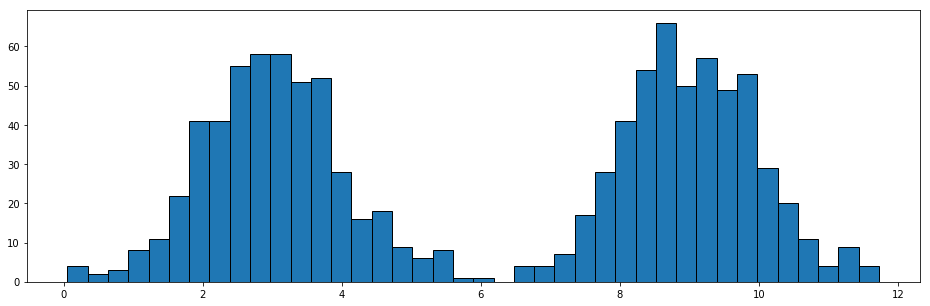

In [898]:
def generate_1():
    random_numbers = []
    for i in range(1000):
        is_first = np.random.random_sample() < 0.5
        if is_first:
            random_numbers.append(np.random.normal(3, 1))
        else:
            random_numbers.append(np.random.normal(9, 1))
    plt.hist(random_numbers, bins=40, edgecolor='black')

generate_1()

E. Bonus: use the other one to generate 1000 more points and draw two comparative histograms.

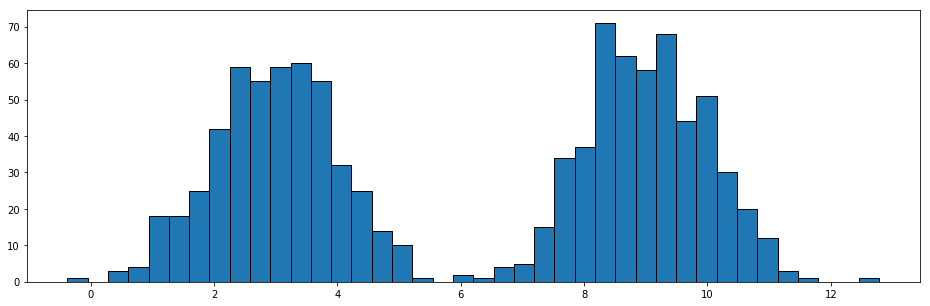

In [899]:
def generate_2():
    random_numbers = []
    for i in range(12):
        points_to_generate = np.round((gm_cdf(i + 1) - gm_cdf(i)) * 1000)
        for j in range (int(points_to_generate)):
            random_numbers.append(i + np.random.random_sample())
    plt.hist(random_numbers, bins=40,color='orange', edgecolor='black')

generate_1()

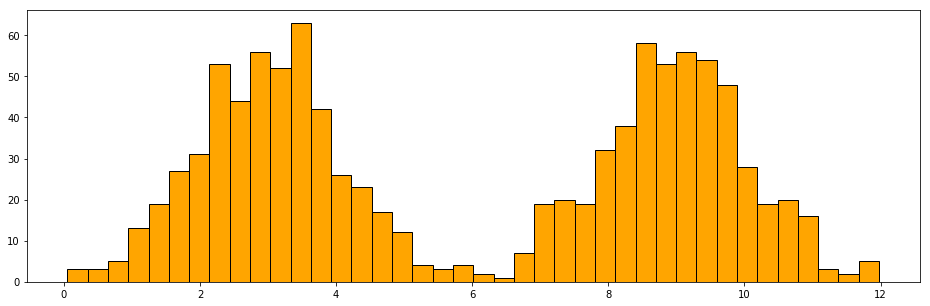

In [900]:
generate_2()

## Question 4
The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 50,000 RCU and a standard deviation of 20,000 RCU.

formatlly, if $X$ is the annual salaries of employees then 
$$ X \sim N(50000, 20000^2) $$

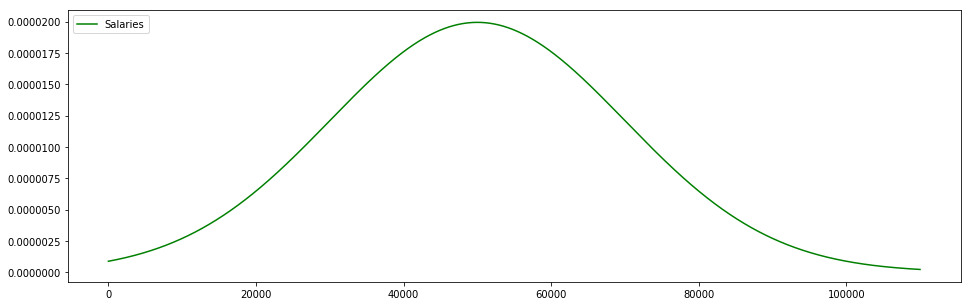

In [901]:
x_axis = np.arange(0, 110000, 10)
plt.plot(x_axis, norm.pdf(x_axis,50000,20000), color='green', label='Salaries')
plt.legend(loc='upper left')
plt.show()

a. What percent of people earn less than 40,000 RCU? 

We shall compute the CDF, $F_{x}(40000) = \Phi(\frac{40000 - 50000}{20000}) = \Phi(-0.5) = 1-\Phi(0.5) $

In [902]:
1 - norm.cdf(0.5)

0.3085375387259869

b. What percent of people earn between 45,000 RCU and 65,000 RCU?

We shall compute the CDF, $F_{x}(65000) - F_{x}(45000) = \Phi(\frac{65000 - 50000}{20000}) - \Phi(\frac{45000 - 50000}{20000}) = \Phi(0.75) - \Phi(-0.25) =\Phi(0.75) - (1-\Phi(0.25))= \Phi(0.75) + \Phi(0.25) - 1 $

In [903]:
norm.cdf(0.75) + norm.cdf(0.25) - 1

0.37207897330605544

c. What percent of people earn more than 70,000 RCU?

We shall compute: $P(X>70000) = 1 - P(X \leq 70000) = 1 - F_{x}(70000) =1 - \Phi(\frac{70000 - 50000}{20000}) = 1-\Phi(1) $

In [904]:
1 - norm.cdf(1)

0.15865525393145707

d. The company has 1000 employees. Do you expect that there are any employees that earn more than 120,000 RCU?  

Let us calculate the probability that there of an employee earning more than 120,000, if that probability is greater than 0.001 then we would expect that our of 1000, there going to be one employee that satisfy this condition.

We shall calculate: $P(X>120000) = 1 - P(X \leq 120000) = 1 - F_{x}(120000) =1 - \Phi(\frac{120000 - 50000}{20000}) = 1-\Phi(3.5) $

In [905]:
1 - norm.cdf(3.5)

0.0002326290790355401

therefore we would not expect that one of 1000 employees will earn more than 120000 (we would expect that one out of 5000 will).

# Question 5

Let $T_n$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

a. Write code to compute the exact value of $E(T_N)$

In [906]:
def probability_coupon_i(i, total_coupons):
    return (total_coupons - (i - 1)) / total_coupons

def expect_coupon(n, total_coupons):
    sum = 0
    for i in range(1, n + 1, 1):
        sum += (1 / probability_coupon_i(i, n))
    return sum
expect_coupon(20, 20)

71.95479314287363

b. Write code to compute the exact value of $V(T_N)$

In [907]:
def var_coupon(n, total_coupons):
    sum = 0
    for i in range(1, n + 1, 1):
        p_i = probability_coupon_i(i, total_coupons)
        sum += (1 - p_i) / (p_i ** 2)
    return sum
print(np.sqrt(var_coupon(20, 20)))

23.801481139255504


c. Write code to exactly compute $P(T_{20} > 60)$

We shall use CLT:

$P(T_{20} > 60) = 1 - P(T_{20} \leq 60)$, $ T_20 \sim N(71.95, 23.8^2)$

In [908]:
1 - norm.cdf(60, expect_coupon(20,20), np.sqrt(var_coupon(20, 20)))

0.6922615384537201

$P(T_{20}\geq 60) \leq \frac{E(T_{20}^2)}{60^2} = \frac{V(T_{20})+ E(T_{20})^2}{60^2}$

In [909]:
(var_coupon(20, 20) + (expect_coupon(20,20) ** 2)) / (60 ** 2)

1.5955563224044635

# Question 6
Let $n$ be an integer, not prime. 
Find two distributions a and b on the nonnegative integers, both not concentrated at $0$ (this is the trivial answer …), such that the convolution of a and b is the equiprobable (uniform) distribution on the set of numbers $0, 1, 2, . . . , n-1$


A is equiprobable distribution over $\{0,1\}$ and B is equiprobable distribution over $\{0,2,...,n-2\}$

$P(A=a)= \frac{1}{2}$ and $P(B=b)=\frac{1}{n-1}$
therefore if Z = A + B we shall consider the two cases: if Z is even we get
$$P(Z= 2k) = P(A=0)P(B=2k) = \frac{1}{2} \cdot \frac{1}{\frac{n}{2}} = \frac{1}{n}$$ 
and if Z is odd
$$ P(Z = 2k + 1) = P(A=1)P(B=2k) = \frac{1}{2} \cdot \frac{1}{\frac{n}{2}} = \frac{1}{n}$$

therefore we got a uniform distribution over $\{0,1,...,n-1\}$